In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.applications import Xception
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense,Flatten,BatchNormalization,Dropout,GlobalAveragePooling2D,Input

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shivendrasinha/combined-datasetdfdcceleb-dfff")

print("Path to dataset files:", path)

100%|██████████| 11.8G/11.8G [01:34<00:00, 134MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/shivendrasinha/combined-datasetdfdcceleb-dfff/versions/1


In [4]:
def lbp_preprocessing(img):

    img = cv2.resize(img, (299, 299))
    img = img.astype(np.uint8)


    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


    lbp = local_binary_pattern(gray, P=8, R=1, method="uniform")


    lbp = lbp / lbp.max()
    lbp_3ch = np.stack((lbp,) * 3, axis=-1).astype(np.float32)

    return lbp_3ch


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator(
    preprocessing_function=lbp_preprocessing,
    rescale=None
)
validation_data = ImageDataGenerator(
    preprocessing_function=lbp_preprocessing,
    rescale=None
)
Testdata = ImageDataGenerator(
    preprocessing_function=lbp_preprocessing,
    rescale=None
)
train_data= train_data.flow_from_directory(
    '/root/.cache/kagglehub/datasets/shivendrasinha/combined-datasetdfdcceleb-dfff/versions/1/Combined dataset/Train',      # your train folder
    target_size=(299, 299),
    batch_size=256,
    class_mode='binary'
)
validation_data = validation_data.flow_from_directory(
    '/root/.cache/kagglehub/datasets/shivendrasinha/combined-datasetdfdcceleb-dfff/versions/1/Combined dataset/Validate',      # your validate folder
    target_size=(299, 299),
    batch_size=256,
    class_mode='binary'
)
Testdata = Testdata.flow_from_directory(
    '/root/.cache/kagglehub/datasets/shivendrasinha/combined-datasetdfdcceleb-dfff/versions/1/Combined dataset/Test',      # your validate folder
    target_size=(299, 299),
    batch_size=256,
    class_mode='binary'
)


Found 45500 images belonging to 2 classes.
Found 13000 images belonging to 2 classes.
Found 6500 images belonging to 2 classes.


In [17]:
convBase = Xception(
    weights ='imagenet',
    include_top =False,
    input_shape =(299,299,3)
)

In [18]:
convBase.trainable = False

In [11]:
for layer in convBase.layers:
    print(layer.name,layer.trainable)

input_layer False
block1_conv1 False
block1_conv1_bn False
block1_conv1_act False
block1_conv2 False
block1_conv2_bn False
block1_conv2_act False
block2_sepconv1 False
block2_sepconv1_bn False
block2_sepconv2_act False
block2_sepconv2 False
block2_sepconv2_bn False
conv2d False
block2_pool False
batch_normalization False
add False
block3_sepconv1_act False
block3_sepconv1 False
block3_sepconv1_bn False
block3_sepconv2_act False
block3_sepconv2 False
block3_sepconv2_bn False
conv2d_1 False
block3_pool False
batch_normalization_1 False
add_1 False
block4_sepconv1_act False
block4_sepconv1 False
block4_sepconv1_bn False
block4_sepconv2_act False
block4_sepconv2 False
block4_sepconv2_bn False
conv2d_2 False
block4_pool False
batch_normalization_2 False
add_2 False
block5_sepconv1_act False
block5_sepconv1 False
block5_sepconv1_bn False
block5_sepconv2_act False
block5_sepconv2 False
block5_sepconv2_bn False
block5_sepconv3_act False
block5_sepconv3 False
block5_sepconv3_bn False
add_3 Fals

In [12]:
for layer in convBase.layers[-4:]:
    layer.trainable = True

In [13]:
for layer in convBase.layers:
    print(layer.name,layer.trainable)

input_layer False
block1_conv1 False
block1_conv1_bn False
block1_conv1_act False
block1_conv2 False
block1_conv2_bn False
block1_conv2_act False
block2_sepconv1 False
block2_sepconv1_bn False
block2_sepconv2_act False
block2_sepconv2 False
block2_sepconv2_bn False
conv2d False
block2_pool False
batch_normalization False
add False
block3_sepconv1_act False
block3_sepconv1 False
block3_sepconv1_bn False
block3_sepconv2_act False
block3_sepconv2 False
block3_sepconv2_bn False
conv2d_1 False
block3_pool False
batch_normalization_1 False
add_1 False
block4_sepconv1_act False
block4_sepconv1 False
block4_sepconv1_bn False
block4_sepconv2_act False
block4_sepconv2 False
block4_sepconv2_bn False
conv2d_2 False
block4_pool False
batch_normalization_2 False
add_2 False
block5_sepconv1_act False
block5_sepconv1 False
block5_sepconv1_bn False
block5_sepconv2_act False
block5_sepconv2 False
block5_sepconv2_bn False
block5_sepconv3_act False
block5_sepconv3 False
block5_sepconv3_bn False
add_3 Fals

In [14]:
model = Model()

inputs = Input(shape=(299, 299, 3))
x = convBase(inputs)
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
y = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(y)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ xception (Functional)           │ (None, 10, 10, 2048)   │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,132,073 (80.61 MB)

 Trainable params: 3,430,145 (13.08 MB)

 Non-trainable params: 17,701,928 (67.53 MB)

In [ ]:
moHist = model.fit(train_data,epochs=10,validation_data=validation_data)

Epoch 1/10
1263/1263 ━━━━━━━━━━━━━━━━━━━━ 294s 226ms/step - accuracy: 0.7006 - loss: 0.6825 - val_accuracy: 0.8177 - val_loss: 0.3923
Epoch 2/10
1263/1263 ━━━━━━━━━━━━━━━━━━━━ 260s 206ms/step - accuracy: 0.8300 - loss: 0.3640 - val_accuracy: 0.8454 - val_loss: 0.3351
Epoch 3/10
1263/1263 ━━━━━━━━━━━━━━━━━━━━ 260s 206ms/step - accuracy: 0.8655 - loss: 0.2955 - val_accuracy: 0.8641 - val_loss: 0.3079
Epoch 4/10
1263/1263 ━━━━━━━━━━━━━━━━━━━━ 260s 206ms/step - accuracy: 0.8898 - loss: 0.2456 - val_accuracy: 0.8812 - val_loss: 0.2816
Epoch 5/10
1263/1263 ━━━━━━━━━━━━━━━━━━━━ 260s 206ms/step - accuracy: 0.9113 - loss: 0.2061 - val_accuracy: 0.8906 - val_loss: 0.2619
Epoch 6/10
1263/1263 ━━━━━━━━━━━━━━━━━━━━ 260s 206ms/step - accuracy: 0.9275 - loss: 0.1714 - val_accuracy: 0.8929 - val_loss: 0.2729
Epoch 7/10
1263/1263 ━━━━━━━━━━━━━━━━━━━━ 260s 206ms/step - accuracy: 0.9391 - loss: 0.1475 - val_accuracy: 0.8951 - val_loss: 0.3121
Epoch 8/10
1263/1263 ━━━━━━━━━━━━━━━━━━━━ 260s 206ms/step - ac

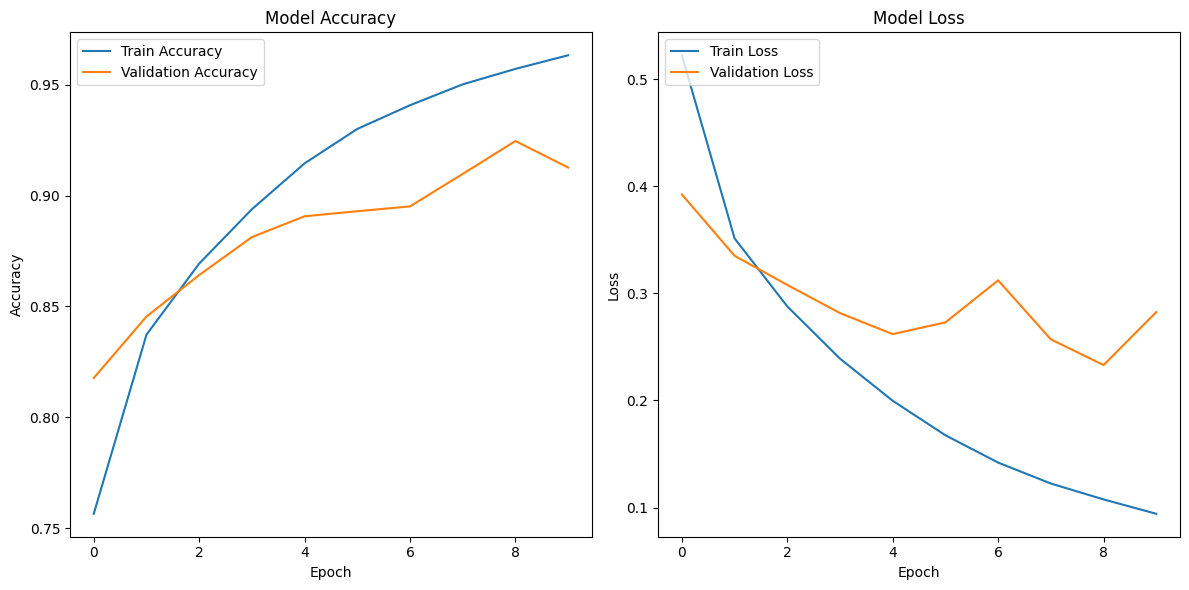

In [ ]:
import matplotlib.pyplot as plt
# Assuming 'history' is your model's training history object
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

# Call this function with your history object
plot_training_history(moHist)


In [ ]:
model.save("XceptionNet_trained_model.h5")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Get model predictions and true labels
def get_predictions_and_labels(model, dataset):
    y_true = []
    y_pred = []

    for images, labels in dataset:
        preds = model.predict(images, verbose=0)
        preds = (preds > 0.5).astype(int).flatten()  # Binary classification
        y_pred.extend(preds)
        y_true.extend(labels.numpy().flatten())

    return np.array(y_true), np.array(y_pred)

# Step 2: Generate and plot confusion matrix
def plot_confusion_matrix(model, dataset, class_names=["Real", "Fake"]):
    y_true, y_pred = get_predictions_and_labels(model, dataset)
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

    plt.figure(figsize=(6, 6))
    disp.plot(cmap='Blues', values_format='d')
    plt.title("Confusion Matrix")
    plt.show()


<Figure size 600x600 with 0 Axes>

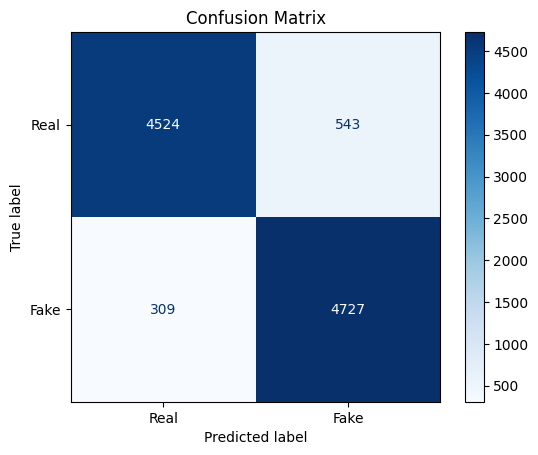

In [ ]:
# After your model is trained
plot_confusion_matrix(model, Testdata)


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

def plot_roc_curve(model, dataset):
    y_true, y_prob = [], []

    for images, labels in dataset:
        probs = model.predict(images, verbose=0).flatten()
        y_prob.extend(probs)
        y_true.extend(labels.numpy().flatten())

    y_true = np.array(y_true)
    y_prob = np.array(y_prob)

    fpr, tpr, _ = roc_curve(y_true, y_prob)
    auc_score = roc_auc_score(y_true, y_prob)

    # Plot ROC
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()


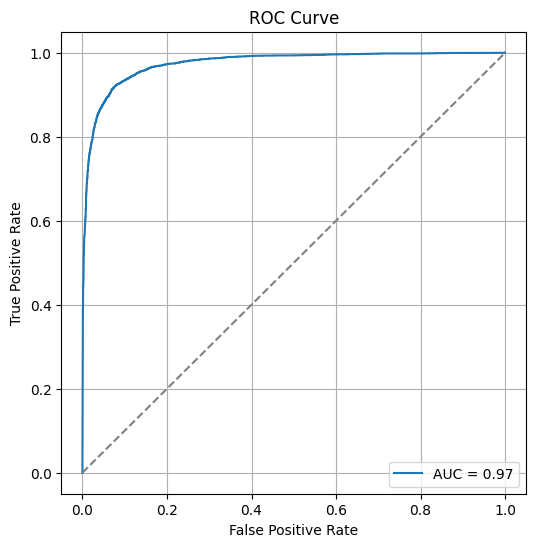

In [ ]:
plot_roc_curve(model, Testdata)